In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [84]:
dataSet = pd.read_csv('Training_Data.csv')
dataSet.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
1,5,8,2012,34,65,13,0.0,86.8,11.1,29.7,5.2,11.5,6.1,fire
2,15,7,2012,30,80,19,0.4,60.7,5.2,17.0,1.1,5.9,0.5,not fire
3,14,6,2012,27,79,16,0.7,53.4,6.4,7.3,0.5,6.1,0.3,not fire
4,24,9,2012,26,49,6,2.0,61.3,11.9,28.1,0.6,11.9,0.4,not fire


In [85]:
# part 1: summary statistics of all attributes
print(dataSet.describe())

              day       month    year  Temperature          RH          Ws  \
count  196.000000  196.000000   196.0   196.000000  196.000000  196.000000   
mean    15.515306    7.500000  2012.0    32.076531   61.964286   15.622449   
std      8.754473    1.107087     0.0     3.752505   15.084846    2.885917   
min      1.000000    6.000000  2012.0    22.000000   21.000000    6.000000   
25%      8.000000    7.000000  2012.0    30.000000   52.750000   14.000000   
50%     16.000000    8.000000  2012.0    32.000000   64.000000   15.000000   
75%     23.000000    8.000000  2012.0    35.000000   74.250000   17.000000   
max     31.000000    9.000000  2012.0    42.000000   90.000000   29.000000   

             Rain        FFMC         DMC          DC         ISI         BUI  \
count  196.000000  196.000000  196.000000  196.000000  196.000000  196.000000   
mean     0.834184   77.602041   14.645918   48.862755    4.789286   16.566837   
std      2.178898   14.699733   12.399819   47.590388 

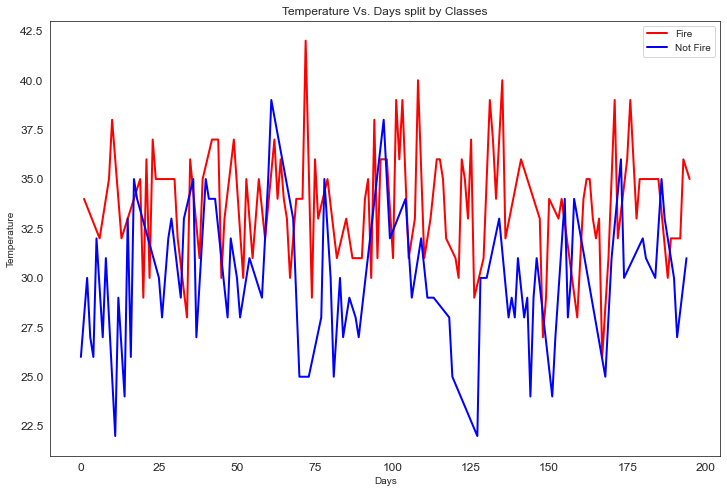

In [86]:
# Part 2: density plot of the entire dataset and split it into two curves (split by Classes, draw the Temperature)
fire = dataSet.query("Classes=='fire'").Temperature
notFire = dataSet.query("Classes=='not fire'").Temperature

df_fire=pd.DataFrame(data=fire)
df_notFire=pd.DataFrame(data=notFire)

plt.figure(figsize=(12,8))

plt.plot(df_fire, color='r',linewidth=2.0)
plt.plot(df_notFire, color='b',linewidth=2.0)

plt.xlabel('Days')
plt.ylabel('Temperature')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Temperature Vs. Days split by Classes')

plt.legend(["Fire", "Not Fire"])
plt.show()

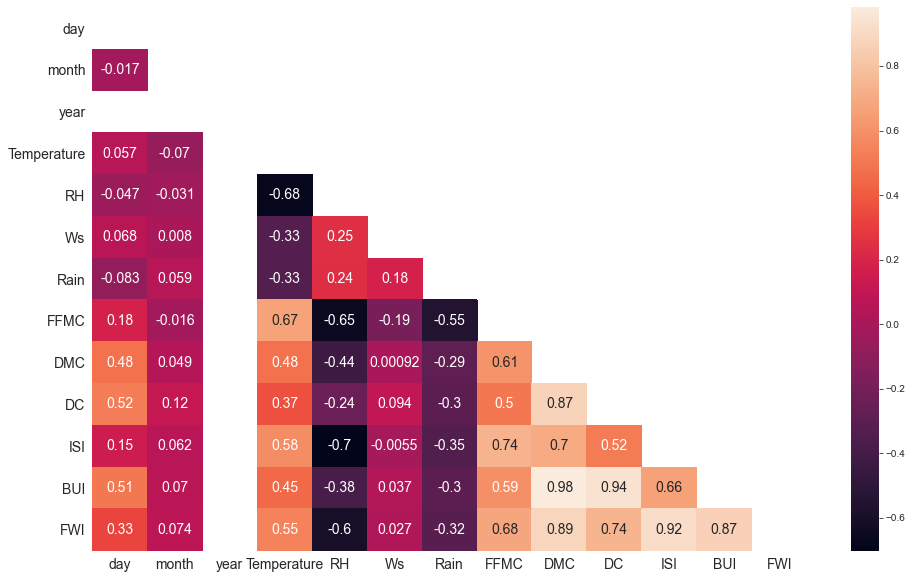

In [87]:
# prt 3: 
mask = np.zeros_like(dataSet.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
plt.figure(figsize=(16,10))
sns.heatmap(dataSet.corr(),mask=mask ,annot=True, annot_kws={"size":14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [88]:
#part 4
dataSet.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
day,1.000000,-0.016667,NaN,0.056864,-0.046731,0.067619,-0.083302,0.181444,0.480100,0.523342,0.151209,0.506580,0.327246
month,-0.016667,1.000000,NaN,-0.069745,-0.030861,0.008025,0.059207,-0.015913,0.049049,0.119414,0.062188,0.069596,0.074363
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.056864,-0.069745,NaN,1.000000,-0.678325,-0.332114,-0.330481,0.669703,0.480867,0.365195,0.584888,0.452066,0.545249
RH,-0.046731,-0.030861,NaN,-0.678325,1.000000,0.247773,0.239048,-0.654652,-0.439121,-0.237376,-0.703098,-0.377814,-0.597897
Ws,0.067619,0.008025,NaN,-0.332114,0.247773,1.000000,0.180503,-0.185915,0.000917,0.093592,-0.005530,0.037100,0.026716
Rain,-0.083302,0.059207,NaN,-0.330481,0.239048,0.180503,1.000000,-0.548769,-0.287882,-0.295879,-0.346332,-0.297967,-0.320713
FFMC,0.181444,-0.015913,NaN,0.669703,-0.654652,-0.185915,-0.548769,1.000000,0.607174,0.503473,0.735816,0.593174,0.684529
DMC,0.480100,0.049049,NaN,0.480867,-0.439121,0.000917,-0.287882,0.607174,1.000000,0.873873,0.699753,0.982294,0.886651
DC,0.523342,0.119414,NaN,0.365195,-0.237376,0.093592,-0.295879,0.503473,0.873873,1.000000,0.518988,0.939106,0.742887


In [89]:
# part 5.a: the best feature that is best used to predict the “Fire Weather Index (FWI)” 
#is ISI because the correlation between them is strong, around 0.93

In [123]:
# part 5.b
linear_model_FWI_One = linear_model.LinearRegression()
linear_model_FWI_One.fit(dataSet[['ISI']], dataSet.FWI)
print(linear_model_FWI_One.coef_)
print(linear_model_FWI_One.intercept_)

[1.64732872]
-0.811466684885569


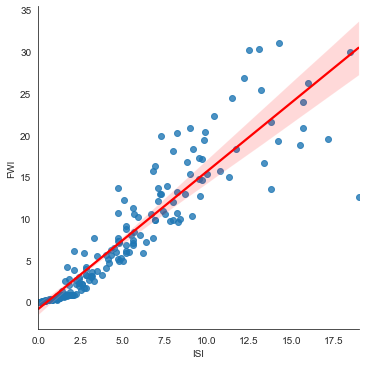

In [124]:
sns.lmplot(data = dataSet, x='ISI', y='FWI', fit_reg=True, line_kws={'color': 'red'})

In [110]:
# test data
testDataSet = pd.read_csv('Testing_Data.csv')

In [129]:
# test linear one
linear_model_FWI_One.predict(testDataSet[['ISI']])

array([ 3.30685512, 10.39036862,  5.44838245, 17.63861499,  8.41357415,
        1.33006065, 12.8613617 ,  0.34166342,  1.49479352,  6.60151256,
       12.53189595,  2.64792363,  4.62471809,  1.16532778, 11.37876585,
        5.7778482 ,  2.8126565 ,  0.17693055,  1.6595264 ,  3.63632086,
       -0.1525352 ,  3.30685512, 15.66182052,  2.48319076, -0.31726807,
       10.22563574, 14.34395755, 11.54349872,  5.44838245,  2.15372501,
       15.16762191, 17.14441637, 13.52029319,  4.13051948,  8.08410841,
        1.6595264 , 26.53419008, 11.87296447,  4.29525235, 10.71983436,
        1.00059491,  8.08410841,  5.28364958,  1.82425927,  6.43677969,
       -0.48200094, -0.31726807])

In [126]:
# part 5.c
linear_model_FWI_Two = linear_model.LinearRegression()
linear_model_FWI_Two.fit(dataSet[['ISI','DMC']], dataSet.FWI)
print(linear_model_FWI_Two.coef_)
print(linear_model_FWI_Two.intercept_)

[1.0571271  0.29056917]
-2.240474787240335


In [130]:
# test linear two
linear_model_FWI_Two.predict(testDataSet[['ISI', 'DMC']])

array([ 4.93522196,  7.24348592, 11.77218751, 16.92169174, 11.43763371,
       -0.11072972, 14.75678755, -0.86123365, -0.20841543,  6.43928091,
       13.52837005,  1.86819171,  3.63071181, -0.04210093, 10.98685225,
        4.37070078,  5.43167749, -0.82166178,  1.64071228,  7.84894062,
        0.47787246,  2.14575796, 27.47930426,  2.19833274, -1.08068608,
        9.4042127 , 13.76138854, 14.23071195,  4.18833228,  1.72539507,
       13.82504142, 14.51245561, 13.40716648,  3.74942743,  7.18729689,
        1.58259844, 21.84564134,  9.38623389,  2.72192039,  9.95380616,
       -0.32215514,  8.2624028 ,  6.20377448,  1.48491274, 16.06763526,
       -0.80865887, -1.28408449])

In [127]:
# part 5.d
linear_model_FWI_Three = linear_model.LinearRegression()
linear_model_FWI_Three.fit(dataSet[['ISI','DMC','BUI','DC','FFMC']], dataSet.FWI)
print(linear_model_FWI_Three.coef_)

[ 1.18509398 -0.02377928  0.32963315 -0.01540861 -0.04997967]


In [131]:
# test linear three
linear_model_FWI_Three.predict(testDataSet[['ISI', 'DMC','BUI','DC','FFMC']])

array([ 5.11568059,  6.71045867, 11.33338348, 16.63274874, 12.17467712,
        0.09324883, 13.91433145, -0.54262826, -0.16960781,  6.25912208,
       14.78877249,  1.21656774,  3.62429526,  0.04016003, 10.99182725,
        3.61604493,  5.6421047 , -0.38023656,  1.3631477 ,  7.53664301,
        1.42658066,  1.4353212 , 26.33987361,  1.61935245, -0.29118514,
        8.71048039, 14.12929546, 14.74749169,  3.63009531,  1.11785119,
       14.82877043, 14.35052625, 14.20966397,  3.44082328,  6.50979144,
        1.23932007, 22.02083518, 10.54344195,  2.29394139,  9.31050115,
       -0.07646544,  7.97676221,  6.64322908,  1.02288423, 17.23698612,
       -0.08263371, -0.46982562])

In [94]:
#part 5.e


In [132]:
#part 6
#split dataset in features and target variable
feature_cols = ['day', 'month', 'Temperature','Rain' ,'RH','Ws','FFMC','DMC','DC','ISI','BUI','FWI']
X = dataSet[feature_cols] # Features
y = dataSet.Classes # Target variable

# instantiate the model (using the default parameters)
logreg = linear_model.LogisticRegression(max_iter=2000)

# fit the model with data
logreg.fit(X,y)

LogisticRegression(max_iter=2000)

In [133]:
logreg.predict(testDataSet[feature_cols])

array(['fire', 'fire', 'fire', 'fire', 'fire', 'not fire', 'fire',
       'not fire', 'not fire', 'fire', 'fire', 'not fire', 'fire',
       'not fire', 'fire', 'fire', 'not fire', 'not fire', 'not fire',
       'fire', 'not fire', 'fire', 'fire', 'not fire', 'not fire', 'fire',
       'fire', 'fire', 'fire', 'not fire', 'fire', 'fire', 'fire', 'fire',
       'fire', 'not fire', 'fire', 'fire', 'fire', 'fire', 'not fire',
       'fire', 'fire', 'not fire', 'fire', 'not fire', 'not fire'],
      dtype=object)

In [142]:
#part 7
from sklearn.neighbors import KNeighborsClassifier  
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=10)

In [136]:
knn.predict(testDataSet[feature_cols])

array(['fire', 'fire', 'fire', 'fire', 'fire', 'not fire', 'fire',
       'not fire', 'not fire', 'fire', 'fire', 'not fire', 'fire',
       'not fire', 'fire', 'fire', 'fire', 'not fire', 'fire', 'fire',
       'not fire', 'not fire', 'fire', 'not fire', 'not fire', 'fire',
       'fire', 'fire', 'fire', 'not fire', 'fire', 'fire', 'fire', 'fire',
       'fire', 'not fire', 'fire', 'fire', 'fire', 'fire', 'not fire',
       'fire', 'fire', 'not fire', 'fire', 'not fire', 'not fire'],
      dtype=object)